In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

test_dir='../dataset/cats_and_dogs_small/test'

test_cats_dir= os.path.join(test_dir,'cats')
test_dogs_dir= os.path.join(test_dir,'dogs')



1 Physical GPUs, 1 Logical GPUs


In [4]:
names=['cat', 'dog'] ## names[0]= cat, names[1]=dog
fnames = sorted([os.path.join(test_dogs_dir, fname) for fname in os.listdir(test_dogs_dir)])
# fnames = sorted([os.path.join(test_cats_dir, fname) for fname in os.listdir(test_cats_dir)])

img_path = fnames[3]




In [5]:
# 이미지를 읽고 크기를 변경합니다
img=cv2.imread(img_path)
img_resize=cv2.resize(img,(128,128))

## 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((128/2, 128/2), 0, 1)  ## Matrix 생성
## 이미지 이동 변환 메트릭스 구하기
M[0, 2]=M[0, 2]+5
M[1, 2]=M[1, 2]+3
test_image = cv2.warpAffine(img_resize, M,(128, 128) )
print(test_image.shape)
test_image_reshape = test_image.reshape(1, 128, 128, 3)



(128, 128, 3)


In [7]:
model = tf.keras.models.load_model('./cats_and_dogs_categorical_classification.hdf5') # 모델을 새로 불러옴


[[0.9999535]]


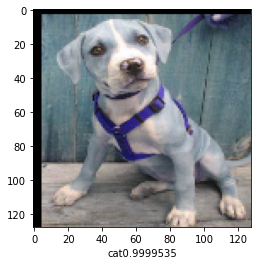

In [9]:
y = model.predict(test_image_reshape)
print(y)
index=np.argmax(y)
plt.imshow(test_image)
plt.xlabel(names[index] + str(y[0, index]))
plt.show()